# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [2]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [3]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

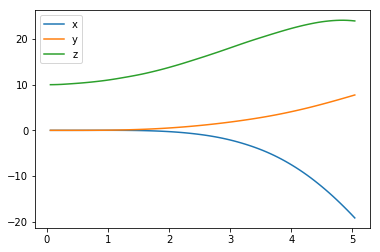

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

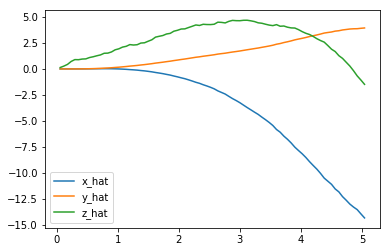

In [8]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

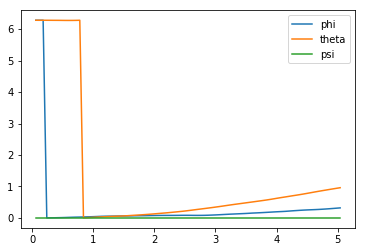

In [9]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

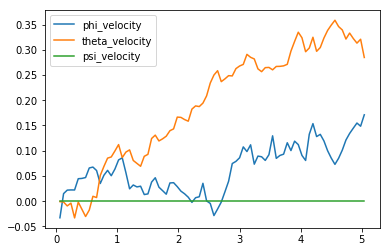

In [10]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

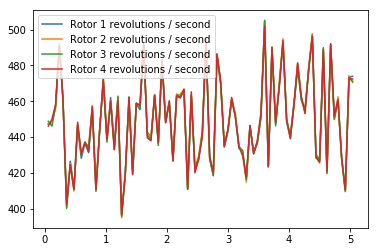

In [11]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [17]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[  3.49897309  -3.3740924   30.95886583   0.15997643   6.26013849   0.        ]
[ 1.92181138  0.32840048  6.74080204]
[ 0.12351751  0.04730664  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [18]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -2.250 (best =   0.031), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [145]:
import sys
import pandas as pd
from task import Task
from agents.agent import DDPG
import copy

num_episodes = 500
target_pos = np.array([0., 0., 30.])
runtime = 5
task = Task(target_pos=target_pos, runtime=runtime)
agent = DDPG(task) 
rewards_history = []

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    score = 0 # reset score to 0 for each new episode.
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        score += reward

        agent.best_score = max(score, agent.best_score)
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f})".format(
                i_episode, score, agent.best_score), end="")
            break
    rewards_history.append(score)
    sys.stdout.flush()

Episode =  500, score = 177.029 (best = 177.083)

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

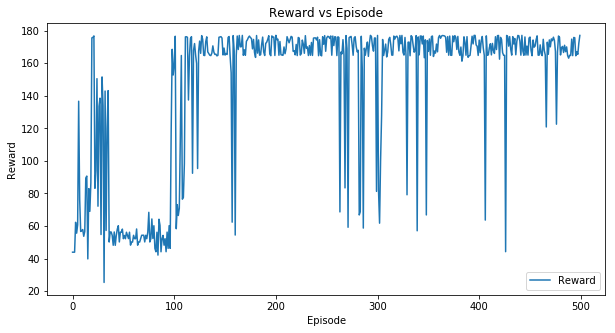

In [146]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,5))
plt.plot(rewards_history, label="Reward")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Reward vs Episode")
plt.legend(loc='best')
plt.show()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

I chose the goal to be a simple task, which is taking off from initial position of [0,0,10] to [0,0,30]. In order to achieve this, I had to minimize the cartesian distance between the quadcopter and the target position, which is given as follows:

distance_from_destination = np.sqrt(
            (current_position[0] - self.target_pos[0]) ** 2 + 
            (current_position[1] - self.target_pos[1]) ** 2 + 
            (current_position[2] - self.target_pos[2]) ** 2
 )

After a few tries, my final reward function was as follows:
- Reward of -1 when the current position is far off from the desired position.
- Some small negative or positive reward between -1 and 1 when the distance difference is reasonably small
- Reward of +1 when the distance is very small

Initially, I had an if statement which assigns -1 for large distance and assign a number between -1 and 1 depending on the absolute distance between quadcopter and the target position. However, I realized this reward, which is directly proportional to the cartesian distance, never really converges since the distance varies significantly over time. Instead, I experimented with sigmoid and hyperbolic tangent functions I learned from deep learning section to assign values between two extremes. I ended up choosing the hyperbolic tangent since I still needed to penalize large distance (sigmoid only ranges between 0 and 1). 

I had to find a suitable constant which scales down the cartesian distance to be used by hyperbolic tangent function. I printed out the maximum, minimum, and mean distance for each steps and starting from constant 0.1, I kept halving it until I found one in the appropriate range. The final constant I picked was 0.007.

In addition to minimizing the absolute distance from target position, I had another minor objective. Even if the distance is minimized, the quadcopter would look funny if the angular orientation is far off from [0,0,0], which is the orientation that’s perpendicular to the ground (this is how most people would expect a drone would take off). To achieve this, I summed up norm of all three values of Euler angles and scaled the reward from distance proportional to sum of angular orientation. To get the expected range of angular orientation (for the default duration of 5 seconds), I printed out min, max, and mean of the sum for each steps and got the following (for 200 episodes):

* max: 6.28318501801
* min: 4.86242157649e-11
* avg: 2.84964022492

The final reward function is as follows:

    def get_reward(self):
        offset_reward = 1.
        current_position = self.sim.pose[0:3]
        current_euler_angles_sum = abs(self.sim.pose[4:6]).sum()
        
        #get the absolute (cartesian) distance between destination and current position
        distance_from_destination = np.sqrt(
            (current_position[0] - self.target_pos[0]) ** 2 + 
            (current_position[1] - self.target_pos[1]) ** 2 + 
            (current_position[2] - self.target_pos[2]) ** 2
        )
        
        reward = np.tanh(offset_reward - 0.007*distance_from_destination) 
        if current_euler_angles_sum > 4.0:
            reward *= 0.95
        elif current_euler_angles_sum > 2.5:
            reward *= 0.97
        elif current_euler_angles_sum > 1.0:
            pass
        elif current_euler_angles_sum > 0.5:
            reward *= 1.01
        else:
            reward *= 1.02
            
        return reward

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

I used the provided DDPG agent along with the actor-critic classes. In order to help increase the general performance, I spent a huge amount of time trying various different combinations of neural network layers in “build_model” methods of actor and critic (increasing the number of dense layers, number of nodes in dense layers, using convolutional layers between dense layers, and more). However, none of them led to an apparent improvement in terms of convergence. Since more complex hidden layers only led to longer training time, I went back to 32-64-32 dense layers with relu activation function. To help overcome possible overfitting, I also tried adding Dropout layers with dropout rate of 0.3 at the end of each dense layers, but removed them since they decreased the overall performance. Finally, Adam optimizer was used for training function, but after trying a few custom learning rates, I ended up sticking with 0.001, which is the default.

build_model architecture of Actor:
- as  described above, it’s 32-64-32 dense layers with dropout layers in between. It is followed by another dense layer with sigmoid activation function and a lambda layer which scales the output to the required range.

build_model architecture of Critic:
- There are two different paths for actions and states. Both paths start with an input layer with the specified sizes (I used the default), and followed by a 32-64 dense layers. These pathways get combined with a relu activation function and routed as the output dense layer with a single unit. This dense layer with a single unit serves as our action values.

After experimenting with a few of hyperparameters many times, I came back to the default ones and ended up changing only the two following parameters:

I realized that my model does find solutions with the highest reward and stays around there for a while, but eventually comes down to ones with low reward and flips between high and low rewards. This behavior was alleviated by changing the following two parameters:
- buffer_size: By increasing the buffer size from 100000 to 150000, I made the model to “remember a little longer”, which decreases its chance of sampling a bad experience and getting stuck there.
- exploration_sigma: By decreasing the sigma value from 0.2 to 0.15, I decreased the chance of exploring by decreasing the weight of a random noise defined in “sample” method of OUNoise.

Other key hyperparameters of the final model are as follows
* gamma (discount factor): 0.99
* tau: 0.01
* batch_size (for experience replay): 64
* exploration_theta: 0.15


**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
I believe even the simple take-off task is a hard task to learn. All 4 rotors have to spin at the right speed to move the quadcopter upwards without moving it laterally too much (variation in x and y axis). Also, although the overall objective is to move it upwards, it cannot keep ascending and move away from the target position. In order to achieve this, the angular velocity of all 4 rotors will vary tremendously during the session.

There was definitely a “aha” moment in the learning curve; the total reward kept fluctuating until around 150th episode, but after then it started converging to a value between 160 and 180. The value did occasionally come down to much lower value, probably because a “bad” experience in replay buffer got selected by random sampling, but it quickly came back up to the high values and stayed there. Before I changed the buffer size and exploration gamma parameters, the model “got stuck” with the low reward as the total reward decreased significantly. 

The mean reward over the last 10 episodes was 168.4, which is not too far from the best solution found (177.083).

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

For me, the hardest part of the project was actually understanding the project requirements, collecting all bits and pieces from the instructions, and putting them together to get me started with the learning process. Concepts that I needed to understand to complete the project such as Actor-Critic method were covered in video lectures but I wasn’t exposed to actual code that implements it. It was overwhelming to understand the provided starter code at first, but once I understood how each one of them work with another, things started to make sense and become clearer. Once the starter code was set up, it was actually a fun process to think about how each parameter affect the learning process, tweak them, and observe how the agent behaves differently. 

The most interesting part was how drastically the behavior of the agent changed as I made changes to reward function. Before working on this project, I found concepts and terms used in reinforcement learning to be very theoretical and hard to understand. I know this is an oversimplified, simulated version of real-world problems, but I found it very interesting that I’m easily able to make the agent behave differently by “telling it what to do”. It was interesting to see that the analogy Alexis used in video lecture (giving a dog a treat whenever it does something I want it to do) is actually more realistic description of how an RL agent is actually trained than I thought. Changing the reward function was no different than changing how I want the dog to behave, and it was fascinating to confirm this from the actual code!